In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("C:/Users/saidh/Desktop/End to End Multiple Disease Detection/data/indian_liver_patient.csv")
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
data.info() # should help us to locate if there are any missing or null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


The column Albumin_and_Globulin_Ratio doesnot have 583 values so we need to correct this in the data preprocessing stage. Now i would like to check if the data is balanced or not by plotting a histogram

Text(0, 0.5, 'Frequency')

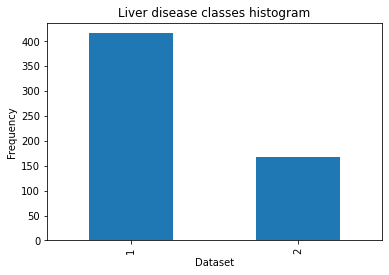

In [4]:
count_classes = pd.value_counts(data['Dataset'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Liver disease classes histogram")
plt.xlabel("Dataset")
plt.ylabel("Frequency")

In [5]:
#Have to remap the class labels for convenience, no liver disease then:=0 for patients having liver disease then:=1
data['Dataset'] = data['Dataset'].map({2:0,1:1}) 

In [6]:
data['Dataset'].value_counts()

1    416
0    167
Name: Dataset, dtype: int64

In [7]:
data['Albumin_and_Globulin_Ratio'].fillna(value=0, inplace=True)


In [8]:
data_features=data.drop(['Dataset'],axis=1)
data_num_features=data.drop(['Gender','Dataset'],axis=1)
data_num_features.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40


In [9]:
data_num_features.describe() # check to whether feature scaling has to be performed or not 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.940566
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.327962
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.920000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cols=list(data_num_features.columns)
data_features_scaled=pd.DataFrame(data=data_features)
data_features_scaled[cols]=scaler.fit_transform(data_features[cols])
data_features_scaled.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.252098,Female,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.123797
1,1.066637,Male,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.612077
2,1.066637,Male,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.154315
3,0.819356,Male,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.181378
4,1.684839,Male,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.649672


In [11]:
data_exp=pd.get_dummies(data_features_scaled)
data_exp.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,1.252098,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.123797,1,0
1,1.066637,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.612077,0,1
2,1.066637,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.154315,0,1
3,0.819356,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.181378,0,1
4,1.684839,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.649672,0,1


<AxesSubplot:title={'center':'Pearson Correlation of liver disease Features'}>

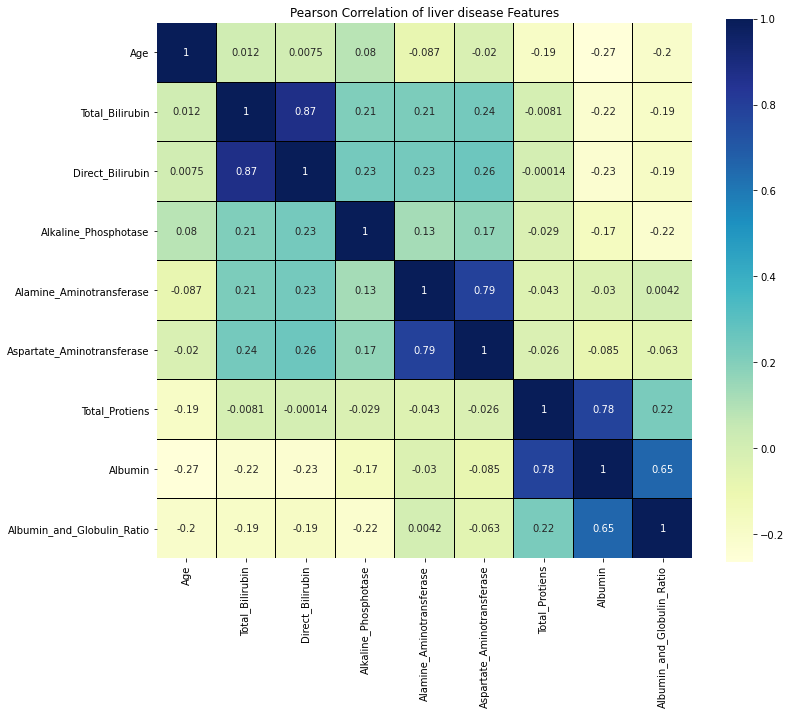

In [12]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of liver disease Features')
# Draw the heatmap using seaborn
sns.heatmap(data_num_features.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black'
            ,annot=True)

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report

In [16]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [17]:
X=data_exp
y=data['Dataset'] 
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [18]:
len(Y_train[Y_train==0])/len(Y_train[Y_train==1])

0.3877551020408163

In [19]:
len(Y_test[Y_test==0])/len(Y_test[Y_test==1])


0.4344262295081967

In [20]:
clf=SVC(random_state=0,kernel='rbf')
clf.fit(X_train,Y_train)
predictions=clf.predict(X_test)

Our accuracy is 212.28070175438597%


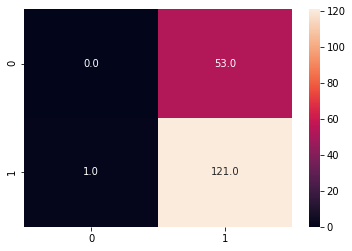

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(Y_test,predictions)
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100))
sns.heatmap(cm,annot=True, fmt=".1f")
plt.savefig('f.png')

In [24]:
from sklearn import grid_search
from sklearn.metrics import make_scorer, fbeta_score,accuracy_score
#from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# Initialize the classifier
clf = SVC(random_state=0,kernel='rbf')

#  Create the parameters list you wish to tune, using a dictionary if needed.
#  parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'C': [10,50,100,200],'kernel':['poly','rbf','linear','sigmoid']}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score,beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = grid_search.GridSearchCV(clf,parameters,scoring=scorer,n_jobs=-1)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train,Y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train,Y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

ImportError: cannot import name 'grid_search'